# Clustering

## Overview

Clustering is about finding groups of related objects within instances. Consider the following example. 

<img src="images/clustering_general.png" alt="Example for Clustering" style="width: 500px;"/>

On the left side are a lot of smilies, which are objects. Clustering takes all these objects and separates them into groups. Above, we have two groups: one with happy smilies and one with sad smilies. The groups are created based on the features of the objects, no other information is used. To get a separation into happy and sad smilies, the features must reflect the emotion. If the features would, e.g., reflect the colors, the clustering algorithm would separate the smilies into yellow and orange smilies. If the features would reflect the degree of facial hair, the clustering algorithm would separate the smilies into those with no beard and those with a moustache. A bit more abstract, clustering can be described as follows. 

<img src="images/clustering_abstract.png" alt="Clustering in general" style="width: 500px;"/>

Thus, we just have objects, a clustering algorithm, and as a results we have groups of related objects. What we do not know without inspection of the clusters is what exactly the relationship between the objects in a group is. 

### The Formal Problem

Formally, we have a set of objects $O = \{object_1, object_2, ...\}$ that may be infinite. Moreover, we have representations of these objects in a feature space $\mathcal{F} = \{\phi(o): o \in O\}$. For clustering, the feature space is usually numeric, i.e., $\mathcal{F} \subseteq \mathbb{R}^d$. The grouping of the objects is described by a map $c: \mathcal{F} \to G$ with $G =\{1, ..., k\}$ and $k \in \mathbb{N}$ the number of clusters. 

### Measuring Similarity

Clusters are groups of *similar* objects. Consequently, the definition of similarity is central to clustering. The approach for clustering is simple: similar means that there is a short *distance* between objects in the feature space. There are different ways to measure distances, as any well-defined metric can be used. In the following, we present the three most commonly used metrics. 

#### Euclidean Distance

By far the the most common distance measure is the *euclidean distance*. The euclidean distance is the direct line between two points.

<img src="images/euclidean.png" alt="Euclidean Distance" style="width: 100px;"/>

The euclidean distance is based on the euclidean norm $||\cdot||_2$ and defined as
$$d(x,y) = ||y-x||_2 = \sqrt{(y_1-x_1)^2+...+(y_n-x_n)^2}.$$

#### Manhatten Distance

Another common distance measure is the *Manhatten distance*, also known as taxi-cab norm. The name of norm comes from the grid of the streets in Manhatten, that is mostly organized in an exis parallel way. Thus, if you want to travel between two points, you cannot use the diagonal.

<img src="images/manhatten.png" alt="Manhatten Distance" style="width: 100px;"/>

The manhatten distances is based on the Manhatten norm $||\cdot||_1$ and defined as
$$d(x,y) = ||y-x||_1 = |y_1-x_1|+...+|y_n-x_n|.$$

#### Chebyshev Distance

The *Chebyshev distance* is another common distance measure. The Chebyshev distance also known as maximum metric and  Chessboard distance. This is because the Chebychev distance is the same as the number of moves that the King in the game of chess needs to reach a certain field. 

<img src="images/chebyshev.png" alt="Chebyshev Distance" style="width: 100px;"/>

Thus, the value of the Chebychev norm is maximum of the distances in any direction. The Manhatten distances is based on the maximum norm $||\cdot||_\infty$ and defined as
$$d(x,y) = ||y-x||_\infty = \max_{i=1, ..., n} |y_1-x_1|.$$

### Evaluation of Clustering Results

The evaluation of clustering results is a bit different from the evaluation of the other categories of algorithms. The reason for this is that there are no generic criteria. Instead, the criteria depend on the clustering algorithm and the use case. 

Each clustering algorithm comes with its own approach for finding related objects, i.e., its own concept of similarity. Consequently, how good the clusters match the data, such that the data within the clusters is really similar to each other, depends on the definition of similarity used by the clustering algorithm. We will discuss such criteria together with algorithms. 

The importance of the use case can be seen using the emoticon example above. If we are interest in emotion, we have a perfect grouping. If we, on the other hand, want to identify emoticons from different sets of emoticons, the clusters should be the orange ones and the yellow ones. Unfortunately, such aspects cannot be measures by generic metrics. Instead, the data scientists, possibly together with domain experts, must analyze the meaning of the clusters in depth. Criteria for such a manual analysis may be if the number of clusters is reasonable, if the objects within a cluster seem similar to domain experts, or if all similar objects are within the same cluster. Unfortunately, such a manual analysis can be very difficult, espeically if the data is very large, there are many clusters, or the data has many different features and thus a high dimension. 

## $k$-Means Clustering

In [1]:
# we need matplotlib for plotting
import matplotlib.pyplot as plt
# we use sklearn to generate data and for the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate sample data, the _ means that we ignore the second return value
X, _ = make_blobs(n_samples=300, centers=4, center_box=(0, 1),
                  cluster_std=0.04, random_state=1)

# we fit a k-means model with four clusters
# then we predict for each point to which cluster it belong
# finally, we determine the location of the cluster centers
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# now we plot the data and the clustering results
f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
axes[0].set_title('Data for clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20)

axes[1].set_title('Result of $k$-means Clustering, $k=4$')
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

<Figure size 1200x400 with 2 Axes>

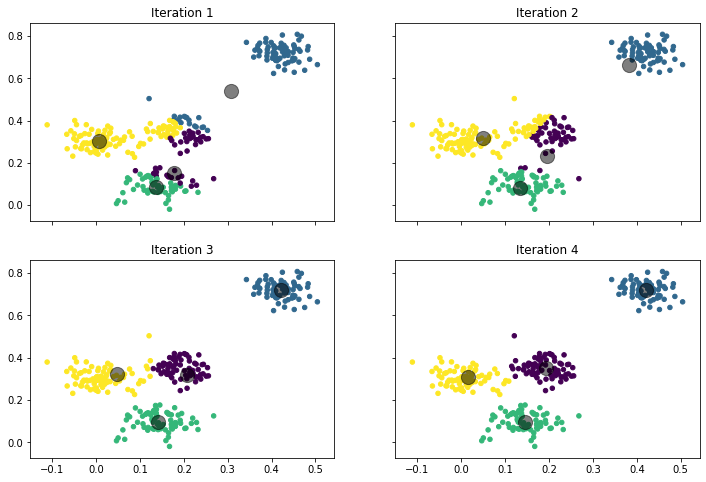

In [2]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

# run the algorithm with k=1,...,4 iterations to demonstrate how it converges
for iter in range(1,5):
    kmeans = KMeans(n_clusters=4,max_iter=iter, n_init=1, init='random', random_state=5)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    ax = axes[min(1,max(0, iter-2)), (iter-1)%2]
    ax.set_title('Iteration %i' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

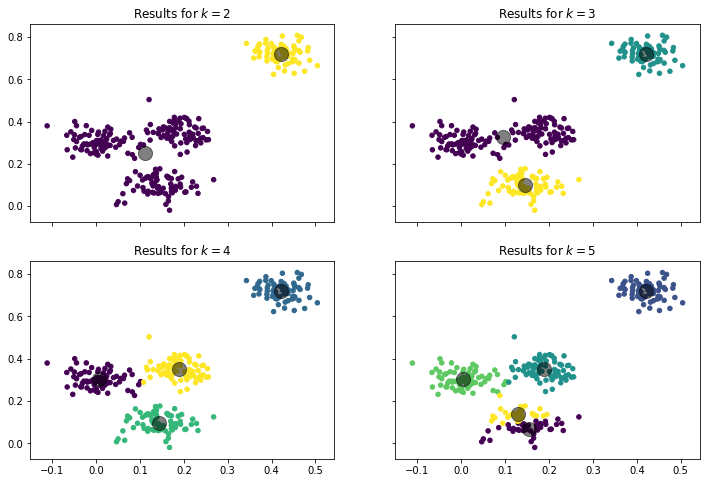

In [3]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

inertia = []
k = range(2,6)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ )
    ax = axes[min(1,max(0, iter-3)), (iter)%2]
    ax.set_title('Results for $k=%i$' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

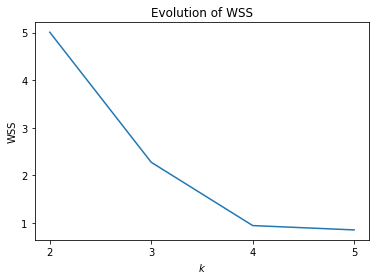

In [4]:
plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

## EM Clustering

## DBSCAN

## Single Linkage Clustering

## Comparison of the Clustering Algorithms